# Effect Size, Power, and Sample Size Selection

This section considers one aspect of experimental design: how to select the sample size for an experiment. That value will depend on characteristics of the underlying data (which are at least partially unknown) and on performance criteria, including the acceptable probabilities of Type I and Type II errors.

We consider only sample size selection for the case of testing a difference of means between two populations with standard deviations that are equal and known. In particular, consider two populations with (unknown) means $\mu_X$ and $\mu_Y$, respectively, and common (but unknown) standard deviation $\sigma$. Suppose we observe $n_X$ random values $\mathbf{X} = \left[ X_0, X_1, \ldots, X_{n_X-1} \right]$ and $n_Y$ random values $\mathbf{Y} = \left[ Y_0, Y_1, \ldots, Y_{n_Y-1} \right]$ from these two distributions.  Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the mean estimators that are computed from $\mathbf{X}$ and $\mathbf{Y}$. By the Central Limit Theorem, if $n_X$ and $n_Y$ are sufficiently large (at least 10), then  $\hat{\mu}_X$ and $\hat{\mu}_Y$ can be modeled as Normal random variables such that
\begin{align*}
\hat{\mu}_X &\sim \mbox{Normal}\left(\mu_X, \frac{\sigma}{n_X} \right) \\
\hat{\mu}_Y &\sim \mbox{Normal}\left(\mu_Y, \frac{\sigma}{n_Y} \right) .
\end{align*}

Let $T$ be a test statistic for a difference of means, where $T =  \hat{\mu}_X -\hat{\mu}_Y$. Then our previous results show that 
\begin{align*}
T &\sim \mbox{Normal}\left(\mu_X - \mu_y , \sigma \sqrt {\frac{1}{n_X} + \frac{1}{n_Y}} \right) .
\end{align*}
For convenience, let 
\begin{align*}
\sigma_T = \sigma \sqrt {\frac{1}{n_X} + \frac{1}{n_Y}} .
\end{align*}

Under $H_0$, $T \sim \mbox{Normal}\left(0, \sigma_T \right)$. A Type I error is rejecting $H_0$ when it is true. I will present the analysis for a one-sided test because it results in a straightforward analysis that can be easily solved without approximation for one special case. I will also present the final result for a two-sided test, along with an approximation that makes it easier to solve. We will consider the one-sided test for $\mu_X > \mu_Y$, under which $H_0$ will be rejected if $T$ is much larger than 0; i.e., $T>\gamma$ for some threshold $\gamma$.  Then 
\begin{align*}
P(T > \gamma) =  Q \left( \frac{\gamma}{\sigma_T}\right).
\end{align*}

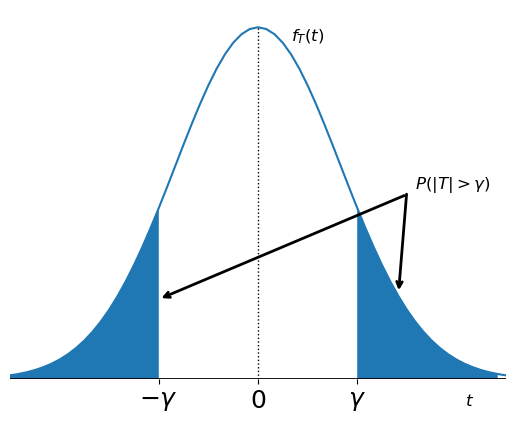

In [1]:
## For two-sided test. Keep for reference

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy.stats as stats

fig = plt.figure()
N1 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N1.pdf(x)
realmax = y.max()

ax = fig.add_subplot(111)
x2 = np.arange(-3, -1.1, 0.1)
y2 = N1.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="C0")#, alpha=0.05)

ticks=[-1.2, 0, 1.2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(["$-\gamma$", "0", "$\gamma$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

x3 = np.arange(1.2, 3, 0.1)
y3 = N1.pdf(x3)
plt.fill_between(x3, 0, y3, facecolor="C0")#, alpha=0.5)

ax.annotate("",
            xy=(1.8, height*3.05), xycoords='data',
            xytext=(1.7, height*1.4), textcoords='data', 
            arrowprops=dict(arrowstyle="<-",
                             lw=2)
           );
ax.annotate("",
            xy=(1.8, height*3), xycoords='data',
            xytext=(-1.2, height*1.3), textcoords='data', 
            arrowprops=dict(arrowstyle="<-",
                             lw=2)
           );
ax.text(1.9, height*3.1, '$P(|T| > \gamma)$',fontsize=12);
ax.text(0.4, height*5.5, '$f_T(t)$',fontsize=12);
ax.text(2.5, -0.03, '$t$',fontsize=12);

Then 
\begin{align*}
P(|T| > \gamma) = 2 Q \left( \frac{\gamma}{\sigma_T}\right).
\end{align*}

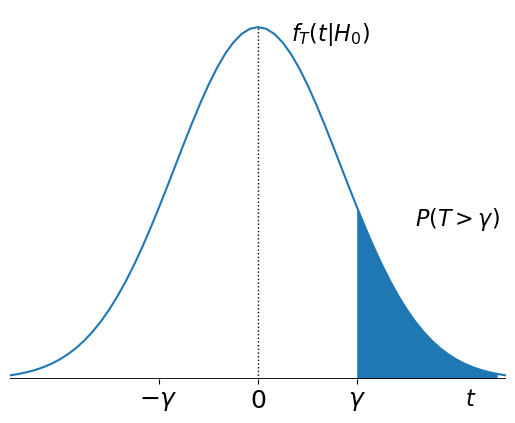

In [2]:
fig = plt.figure()
N1 = stats.norm(0, 1)
x = np.arange(-3, 3.1, 0.1)
y = N1.pdf(x)
realmax = y.max()

ax = fig.add_subplot(111)
x2 = np.arange(-3, -1.1, 0.1)
y2 = N1.pdf(x2)
#plt.fill_between(x2, 0, y2, facecolor="C0")#, alpha=0.05)

ticks=[-1.2, 0, 1.2]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(["$-\gamma$", "0", "$\gamma$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 3])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
# ax.annotate("",
#             xy=(-1.2, height), xycoords='data',
#             xytext=(0, height), textcoords='data',
#             arrowprops=dict(arrowstyle="<->",
#                             connectionstyle="arc3"),
#             )
# ax.annotate("$\gamma$",
#             xy=(-1, height*1.15), xycoords='data',
#             xytext=(-0.75, height*1.25), textcoords='data', fontsize=18
#             );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

x3 = np.arange(1.2, 3, 0.1)
y3 = N1.pdf(x3)
plt.fill_between(x3, 0, y3, facecolor="C0")#, alpha=0.5)


ax.text(1.9, height*2.5, '$P(T > \gamma)$',fontsize=16);
ax.text(0.4, height*5.5, '$f_T(t|H_0)$',fontsize=16);
ax.text(2.5, -0.03, '$t$',fontsize=16);

Note, however, that this probability depends on $\sigma_T$, which depends $n_X$ and $n_Y$.  Since $n_X$ and $n_Y$ are sample sizes that we wish to choose, this may seem like we are going in circles. However, we will find that we can put this together with other information to determine the necessary sample sizes. 

Let the acceptable probability of Type I error be denoted by $\alpha$. Then we can solve for the threshold $\gamma$ as

\begin{align*}
  Q \left( \frac{\gamma}{\sigma_T}\right) & = \alpha \\
  \frac{\gamma}{\sigma_T} &=  Q^{-1} \left( \alpha \right) \\
\gamma &= \sigma_t Q^{-1} \left( \alpha \right).
\end{align*}

Now consider the probability of Type II error, which is the probability of failing to reject the $H_0$ when $H_a$ is true. Let $\beta$ denote the acceptable probability of Type II error. Usually, the value of $\beta$ is not specified directly; instead, the *power* of the test is specified, which is $1-\beta$. A typical target value for statistical power is 80%, but higher values are sometimes used.

Under $H_a$, the expected value of $T$ is $\mu_a- \mu_b$, which is greater than zero for our one-sided test. Then a visualization of  $P(T \leq \gamma)$ is shown below.

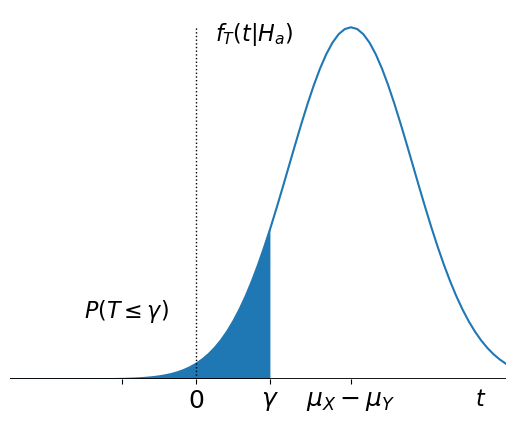

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig = plt.figure()
mean=2.5
N1 = stats.norm(mean, 1)
x = np.arange(-3, 7.1, 0.1)
y = N1.pdf(x)
realmax = y.max()

ax = fig.add_subplot(111)
x2 = np.arange(-3, 1.3, 0.1)
y2 = N1.pdf(x2)
plt.fill_between(x2, 0, y2, facecolor="C0")#, alpha=0.05)

ticks=[-1.2, 0, 1.2, mean]
ax.set_xticks(ticks)
ax.axes.xaxis.set_ticklabels(["", "0", "$\gamma$",
                             "$\mu_X - \mu_Y$"], fontsize=18)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.plot(x, y)
plt.xlim([-3, 5])
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ymin=0
plt.ylim(ymin, ymax)
ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color="black", linewidth=2))
ax.get_xaxis().tick_bottom()
height=ymax/6
# ax.annotate("",
#             xy=(-1.2, height), xycoords='data',
#             xytext=(0, height), textcoords='data',
#             arrowprops=dict(arrowstyle="<->",
#                             connectionstyle="arc3"),
#             )
# ax.annotate("$\gamma$",
#             xy=(-1, height*1.15), xycoords='data',
#             xytext=(-0.75, height*1.25), textcoords='data', fontsize=18
#             );
plt.vlines(x=0, ymin=0, ymax=realmax, color='k', ls=':', lw=1);

x3 = np.arange(1.2, 3, 0.1)
y3 = N1.pdf(x3)
#plt.fill_between(x3, 0, y3, facecolor="C0")#, alpha=0.5)


ax.text(-1.8, height, '$P(T \leq \gamma)$',fontsize=16);
ax.text(0.3, height*5.5, '$f_T(t|H_a)$',fontsize=16);
ax.text(4.5, -0.03, '$t$',fontsize=16);

Then we can express the probability of Type II error as
\begin{align*}
P(T \le \gamma) = Q\left (\frac{\mu_X - \mu_Y - \gamma}{\sigma_T} \right).
\end{align*}
Setting this equal to $\beta$ and solving for $\gamma$ yields
\begin{align*}
 Q\left (\frac{\mu_X - \mu_Y - \gamma}{\sigma_T} \right) & = \beta \\
\frac{\mu_X - \mu_Y - \gamma}{\sigma_T}  & =   Q^{-1}\left (\beta \right)\\
\mu_X - \mu_Y - \gamma  & =  \sigma_T Q^{-1}\left (\beta \right)\\
 \gamma  & =  \mu_X - \mu_Y - \sigma_T Q^{-1}\left (\beta \right).
\end{align*}

Combining this with the result for Type I error, we have
\begin{align*}
\sigma_T \left[Q^{-1} \left( \alpha \right)
+ Q^{-1}\left[ (\beta \right) \right]
& =  \mu_X - \mu_Y.
\end{align*}
Substituting the value for $\sigma_T$ yields
\begin{align*}
\sigma \sqrt{\frac{1}{n_X} + \frac{1}{n_Y} } 
\left[Q^{-1} \left( \alpha \right) + Q^{-1}\left[ (\beta \right) \right]
& =  \mu_X - \mu_Y \\
 \sqrt{\frac{n_X + n_Y}{n_X n_Y}  } 
\left[Q^{-1} \left( \alpha \right) + Q^{-1}\left[ (\beta \right) \right]
& =  \frac{\mu_X - \mu_Y}{\sigma}. \\
\end{align*}

Let
\begin{align*}
d =\frac{\mu_X - \mu_Y}{\sigma}
\end{align*}
be *Cohen's $d$*, which is a type of *effect size*:

````{card}
DEFINITION
^^^
```{glossary}
effect size 
    One of many measures of separation between distributions. For a difference of means, Cohen's $d$ is standard: 
    \begin{equation*}
    d =\frac{\mu_X - \mu_Y}{\sigma}.
    \end{equation*}
```
````


Cohen's $d$ is the normalized difference in the means between the two groups. In practice, the effect size is not known before the experiment, but it is often practical to make some assumption about the effect size. We can either use information from other studies to estimate the effect size, or for intervention tests (for instance, medical drugs), the intervention may only be worth pursuing if it has a significant effect compared to no intervention. Effect sizes are also often specified by descriptors, which are adjectives that indicate the relative effect size and which have been specified in the statistics literature according to the table below.

Cohen's $d$ | Effect size descriptor 
--- | ---
0.01 | Very small
0.2 | Small 
0.5 | Medium
0.8 | Large
1.2 | Very large
2.0 | Huge

Using the definition of Cohen's $d$ and reorganizing the equation yields the following relation that can be solved for $n_X$ and $n_Y$ in terms of $\alpha$, $\beta$, and $d$,
\begin{align*}
\frac{n_X n_Y}{n_X + n_Y}  &=
\frac{ \left[Q^{-1} \left( \alpha \right)
+ Q^{-1}(\beta) \right] ^2 }{d^2}.
\end{align*}
In general, multiple possible solutions can be found using a computer. If we consider equal sample sizes, $n_X = n_Y$, then the formula simplifies to
\begin{align*}
n_X  &= 
\frac{ 2 \left[Q^{-1} \left( \alpha \right)
+ Q^{-1}(\beta) \right] ^2 }{d^2}.
\end{align*}

A function to calculate the size of two equal-sized groups given the values of the significance level ($\alpha$), power ($1-\beta$), and the effect size ($d$) is below:

In [4]:
from scipy import stats
def qinv(x):
  return stats.norm.isf(x)

def group_size_1sided(significance, power, effect_size):
  return 2*(qinv(significance) + 
          qinv(1-power)) **2 /(effect_size)**2

For example, for a statistical significance of 0.05, power of 0.8, and effect size of 0.8, the size of each group should be at least

In [5]:
group_size_1sided(0.05, 0.8, 0.8)

19.32049135006178

Since we cannot use fractionally sized groups, we will generally have to round up to the next largest integer, so groups of size 20 will be required, for 40 total participants.

Let's test this result for a simple data set, where the groups come from uniform distributions on intervals of length 10. Let the random variables that the data from the two groups be denoted by $X$ and $Y$, respectively.  Let $Y$ represent the data from our control group and assume $Y \sim$ Uniform[0,10].

To evaluate the probability of false alarm and the probability of miss, we have to create two different distributions for $X$: 

* When $H_0$ is true, then $X$ should have the same distribution as $Y$. Let `X0` have distribution $[0,10]$.
* When $H_a$ is true, then $X$ should have a distribution that differs from $Y$ at some effect size. Assuming a "Large" effect size, the normalized mean of $X$ should differ from the mean of $Y$ by 0.8. Thus, let `X1` have distribution that is shifted by $0.8 \sigma$, where $\sigma$ is the standard deviation of a uniform random variable on an interval of length 10.

In [6]:
X0 = stats.uniform(loc=0, scale=10)
stdX=X0.std()
stdX

2.8867513459481287

Then the interval should be shifted by

In [7]:
0.8*stdX

2.309401076758503

In [8]:
X1 = stats.uniform(loc=2.31, scale=10)

In [9]:
Y = stats.uniform(loc=0, scale =10)
Y.std()

2.8867513459481287

Since we are assuming that the standard deviation of the distributions is known, we can calculate the threshold $\gamma$ based on the significance $\alpha=0.05$ as
\begin{align*}
\gamma &= \sigma_t Q^{-1} \left( \alpha \right).
\end{align*}
If $\sigma$ is the original standard deviation, then  
\begin{align*}
\sigma_T &= \sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{n} } \\
&=\sigma  \sqrt{\frac{2}{n} } \\
\end{align*}

Then the threshold $\gamma$ is 

In [10]:
import numpy as np

n=20
gamma = stdX*np.sqrt(2/n) * qinv(0.05)
gamma

1.501539058792515

In [11]:
# Run a simulation to determine achieved alpha
num_sims = 10_000

count = 0
for sim in range(num_sims):
  x = X0.rvs(n)
  y = Y.rvs(n)

  t = x.mean() - y.mean()
  if t >= gamma:
    count += 1
    
print(count/num_sims)

0.0492


In [12]:
# Run a simulation to determine achieved beta
num_sims = 10_000

count = 0
for sim in range(num_sims):
  x = X1.rvs(n)
  y = Y.rvs(n)

  t = x.mean() - y.mean()
  if t < gamma:
    count += 1
    
print(count/num_sims)

0.1912


The achieved $\alpha$ and $\beta$ are very close to the target values, even though the actual sampling distribution of $\hat{\mu}_X$ and $\hat{\mu}_Y$ will not be exactly Normal.


Note that the smaller the effect size, the larger the groups must be. For instance, if the effect size is only $d=0.2$, the required group sizes for $\alpha=0.05$ and $\mbox{power}=0.8$ are

In [13]:
group_size_1sided(0.05, 0.8, 0.2)

309.12786160098847

Although we may be able to obtain statistical significance with such large groups, the meaningfulness of that result may be reduced because the two groups are not very different from each other in terms of their means relative to their standard deviations.

**Two-Sided Tests**

For a two-sided NHST, the values of $n_X$ and $n_y$ must satisfy
\begin{align*}
2 Q \left( \frac{\gamma}{\sigma_T} \right) = \alpha, \mbox{ and} \\
Q \left( \frac{\mu_X - \mu_Y - \gamma}{\sigma_T} \right) -
Q \left( \frac{\mu_X - \mu_Y + \gamma}{\sigma_T} \right) = \beta.
\end{align*}
The form of the second equation prevents us from solving for $\gamma$, but the second term in that equation is usually much, much smaller than the first term and thus can be neglected. After simplification, we get a form that is almost identical to the result for a one-sided test:
\begin{align*}
\frac{n_X n_Y}{n_X + n_Y}  &=
\frac{ \left[Q^{-1} \left( \alpha/2 \right)
+ Q^{-1}(\beta) \right] ^2 }{d^2},
\end{align*}
which for equal group sizes simplifies to 
\begin{align*}
n_X  &= 
\frac{ 2 \left[Q^{-1} \left( \alpha/2 \right)
+ Q^{-1}(\beta) \right] ^2 }{d^2}.
\end{align*}

A function to calculate group sizes for the two-sided test is below:

In [14]:
def group_size_2sided(significance, power, effect_size):
  return 2*(qinv(significance/2) + 
          qinv(1-power)) **2 /(effect_size)**2

For example, for the two-sided test with significance level $\alpha=0.05$, power $1-\beta = 0.8$, and effect size $d=0.8$, the necessary group sizes are 

In [15]:
group_size_2sided(0.05, 0.8, 0.8)

24.527749169840906

For more general cases of determining group sizes, such as unequal group sizes and unknown or unequal standard deviations among the groups, the `statsmodels.stats.power` library provides a variety of functions to calculate necessary group sizes.

Thus, power and effect size can be combined with the statistical significance threshold to estimate the number of participants that will be needed for an experiment.

## Terminology Review

Use the flashcards below to help you review the terminology introduced in this chapter. $~~~~ ~~~~ ~~~~$

In [16]:
from jupytercards import display_flashcards

display_flashcards('flashcards/'+'sample-size-selection.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='09-moments/flashcards/'
#display_flashcards(github+'sample-size-selection.json')

<IPython.core.display.Javascript object>